# **Hands-on 1: Perceptron Notebook (Tutorial)**

**Alumno: Claudio Francisco Ponce Sandoval**


---


# Fundamentos de la técnica

El Perceptrón es un clasificador lineal simple para problemas de clasificación binaria (separar datos en dos grupos).

Su función se basa en encontrar un hiperplano (una línea en el caso de 2 dimensiones) que separe los datos pertenecientes a las dos clases.

- Entrada: Recibe un conjunto de características.

- Proceso: Multiplica cada característica por un "peso" y suma los resultados. A esto le añade un "sesgo" (bias).

- Salida: Si la suma total supera un cierto umbral, la neurona "se activa" y predice la clase 1. Si no lo supera predice la clase 0 o -1, según la implementación.

Se entrena ajustando los pesos con un algoritmo de aprendizaje supervisado hasta que los patrones queden correctamente clasificados o se alcance un número máximo de iteraciones.

# Modelo Matemático del Perceptrón.

El perceptrón es un clasificador lineal que decide una clase a partir de una combinación lineal de sus entradas.  
Su funcionamiento se describe con la siguiente ecuación:

$$
y = f\left( \sum_{i=1}^{n} w_i x_i + b \right)
$$

Donde:
* $x_i$: son las características de entrada del patrón.
* $w_i$: son los pesos que multiplican cada característica.
* $b$: es el sesgo (bias), que desplaza el hiperplano de decisión.
* $f$: es la función de activación, normalmente la función escalón.
### Función de activación (escalón)

El perceptrón usa una función que produce **1** o **0** dependiendo del signo de la combinación lineal:

$$
f(z) =
\begin{cases}
1 & \text{si } z \ge 0 \\
0 & \text{si } z < 0
\end{cases}
$$

### Hiperplano de decisión

El modelo aprende un hiperplano lineal que separa las clases:

$$
w_1 x_1 + w_2 x_2 + \cdots + w_n x_n + b = 0
$$

sando notación vectorial (producto punto), la fórmula se simplifica a:$$z = w \cdot x + b$$

Cualquier punto para el cual:

* $w \cdot x + b \ge 0$ se clasifica como **Clase 1**
* $w \cdot x + b < 0$ se clasifica como **Clase 0**




# Descripción de librerías, clases, funciones

Para este tutorial, se emplearon las siguientes herramientas clave:

* **`import pandas as pd`**: Es fundamental para la manipulación de datos. La use para cargar el CSV y manejar los datos en una estructura tabular llamada DataFrame.

* **`import numpy as np`**: Es la biblioteca base para la computación numérica en Python. `scikit-learn` opera principalmente con arrays de NumPy.

* **`import matplotlib.pyplot as plt`**: La biblioteca principal para visualización de datos. Se utiliza para crear el gráfico de dispersión.

* **`from sklearn.model_selection import train_test_split`**:  Esta es de una utilidad muy importante para dividir nuestro dataset en conjuntos de entrenamiento y prueba.

* **`from sklearn.preprocessing import StandardScaler`**: La use para estandarizar nuestras características, lo que ayuda a que el Perceptrón funcione mejor.

* **`from sklearn.linear_model import Perceptron`**: Este es el algoritmo de clasificación lineal que vamos a entrenar.

* **`from sklearn.metrics import accuracy_score`**: Usada en la fase de evaluación para calcular el porcentaje de aciertos del modelo.



---


* **`plt.scatter()` (de Matplotlib)**
  Usada para crear el gráfico de dispersión. Fue clave para demostrar que las flores "Setosa" se podían separar con una línea recta.

* **`train_test_split()` (de Scikit-learn)**
  Usada para dividir los datos en un grupo de entrenamiento con el que aprende el modelo y un grupo de prueba con el que se evalúa.

* **`StandardScaler()` (de Scikit-learn)**
  Usada para crear un objeto `scaler`. Importante para escalar los datos, poner `petal_length` y `petal_width` en un rango similar, para que el Perceptrón aprendiera mejor.

* **`Perceptron()` (de Scikit-learn)**
  De las mas importantes. Es el modelo de Perceptron en si. Se creo un objeto `perceptron_model` que luego use para entrenar `.fit()` y predecir `.predict()`.

* **`accuracy_score()` (de Scikit-learn)**
  Usada para calcular la calificación final del modelo, comparando las predicciones con las respuestas correctas y dando el porcentaje de aciertos.

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score

# Cargar del dataset
df_iris = pd.read_csv("iris.csv")
df_iris


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


Se preparan los datos limpiando los nombres de las columnas cambiando los "." por "_" para que sea más fácil usarlos en Python.

Ademas convertire el problema de 3 clases ("Setosa", "Versicolor", "Virginica") en uno de 2 clases:

Clase 1: "Setosa"

Clase 0: "No Setosa" (todas las demás)

In [34]:
# Preparación de los Datos

# Limpiar nombres de columnas
df_iris.columns = df_iris.columns.str.replace('.', '_', regex=False)
print("Nombres de columnas limpios:")
print(df_iris.columns)

y = (df_iris['variety'] == 'Setosa').astype(int)  # Se crea la variable objetivo binaria 'y'

# Se hace el conteo de cuantas Setosas y No Setosas tenemos.
print("\nConteo de clases:")
print(y.value_counts())

Nombres de columnas limpios:
Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'variety'],
      dtype='object')

Conteo de clases:
variety
0    100
1     50
Name: count, dtype: int64


# Feature Engineering

Usare solo dos de las 4 caracteristicas, petal_length y petal_width. Esto porque son las dos mejores caracteristicas para separar la especie setosa de las demas.

In [24]:
# Se seleccionan solo las dos columnas que definí

X = df_iris[['petal_length', 'petal_width']]

print("Features (X) - Primeras 5 filas:")
print(X.head())

print("\nTarget (y) - Primeras 5 filas:")
print(y.head())

Features (X) - Primeras 5 filas:
   petal_length  petal_width
0           1.4          0.2
1           1.4          0.2
2           1.3          0.2
3           1.5          0.2
4           1.4          0.2

Target (y) - Primeras 5 filas:
0    1
1    1
2    1
3    1
4    1
Name: variety, dtype: int64


# Modelo Selection

¿Por qué usar un Clasificador Lineal Perceptron?

Una de las razones es que nuestros datos "Setosa vs no Setosa" son linealmente separables.

Es posible trazar una única línea recta que separe perfectamente todas las flores "Setosa" (Clase 1) de las "No Setosa" (Clase 0). El Perceptrón está diseñado exactamente para encontrar esta línea.

Ademas de que el perceptron es eficiente, rápido de entrenar y fácil de interpretar.


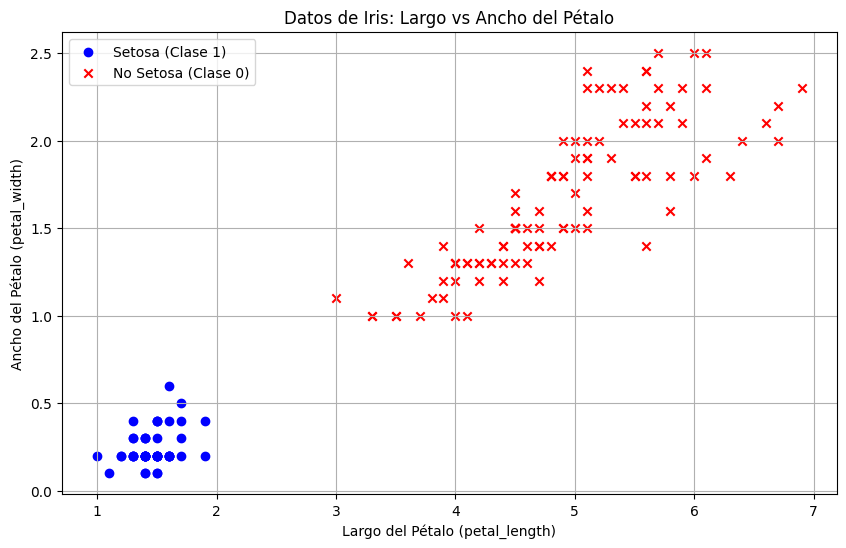

In [36]:
# Se crea el Gráfico de Dispersión y se grafican los puntos donde "y" es 1 (Setosa)
plt.figure(figsize=(10, 6))

plt.scatter(X[y == 1]['petal_length'],
            X[y == 1]['petal_width'],
            color='blue', marker='o', label='Setosa (Clase 1)')

# Y de igual forma se grafica los puntos donde "y" es 0 (No Setosa)
plt.scatter(X[y == 0]['petal_length'],
            X[y == 0]['petal_width'],
            color='red', marker='x', label='No Setosa (Clase 0)')

plt.title('Datos de Iris: Largo vs Ancho del Pétalo')
plt.xlabel('Largo del Pétalo (petal_length)')
plt.ylabel('Ancho del Pétalo (petal_width)')
plt.legend()
plt.grid(True)
plt.show()


# Model Training

In [37]:
# Se dividen los datos (80% entrenamiento, 20% prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

scaler = StandardScaler() # Se escalan los datos

X_train_scaled = scaler.fit_transform(X_train) # Ajustamos el escalador solo con los datos de entrenamiento

X_test_scaled = scaler.transform(X_test) # Transformamos los datos de prueba con el escalador ya ajustad

perceptron_model = Perceptron(max_iter=1000, eta0=0.1, random_state=42)

perceptron_model.fit(X_train_scaled, y_train)

print(f"Pesos (w) aprendidos: {perceptron_model.coef_}")
print(f"Sesgo (b) aprendido: {perceptron_model.intercept_}")

Pesos (w) aprendidos: [[-0.14418761 -0.08131278]]
Sesgo (b) aprendido: [-0.1]


# Prediction

In [39]:
def predecir_flor(largo_petalo, ancho_petalo):

    patron_df = pd.DataFrame([[largo_petalo, ancho_petalo]],  # Se crea un DataFrame con los nombres de columna exactos
                             columns=['petal_length', 'petal_width'])

    patron_scaled = scaler.transform(patron_df)

    prediccion = perceptron_model.predict(patron_scaled)[0]

    # Resultado
    print(f"\n\n--- Prueba con: Largo={largo_petalo}, Ancho={ancho_petalo} ---")
    if prediccion == 1:
        print("Predicción: Clase 1 (¡Es una Setosa!)")
    else:
        print("Predicción: Clase 0 (No es una Setosa)")


print("Predicción:\n")
predecir_flor(1.4, 0.2)
predecir_flor(5.0, 1.5)

Predicción:



--- Prueba con: Largo=1.4, Ancho=0.2 ---
Predicción: Clase 1 (¡Es una Setosa!)


--- Prueba con: Largo=5.0, Ancho=1.5 ---
Predicción: Clase 0 (No es una Setosa)


# Model Evaluation

In [44]:
y_pred = perceptron_model.predict(X_test_scaled) # Se usa el modelo entrenado para predecir todos los datos de prueba

#Calcular el Accuracy comparando las predicciones (y_pred)
accuracy = accuracy_score(y_test, y_pred) #con las etiquetas reales (y_test)

print(f"Predicciones del modelo (y_pred): {y_pred}")
print(f"Valores reales (y_test):         {y_test.values}")
print(f"\nEl Accuracy del modelo Perceptrón es: {accuracy * 100:.2f}%")



Predicciones del modelo (y_pred): [0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0]
Valores reales (y_test):         [0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 0]

El Accuracy del modelo Perceptrón es: 100.00%


# Referencias Bibliograficas

Daniel. (2023, 30 octubre). Perceptrón: ¿qué es y para qué sirve? DataScientest. https://datascientest.com/es/perceptron-que-es-y-para-que-sirve

Brownlee, J. (2020, 10 diciembre). Perceptron Algorithm for Classification in Python. MachineLearningMastery.com. https://machinelearningmastery.com/perceptron-algorithm-for-classification-in-python/

Gn, S. (2025, 6 abril). The Perceptron Algorithm: from scratch using Python. Quark Machine Learning. https://www.quarkml.com/2022/12/perceptron-algorithm-understanding-and-implementation-python.html

El poder del Cómputo. (2022, 21 junio). El Perceptrón paso a paso en Python || Programación en Python [Vídeo]. YouTube. https://www.youtube.com/watch?v=6W-p4qziSW8